# Data Cleaning

## Define the Problem
How can we more accurately classify the poverty levels of Costa Rican households using observeable attributes, ie education level, monthly rent, building materials, or assets, in order to predict their level of need? In order to assess the accuracy of any predictive model built, an F1 score will be used to evaluate its predictiveness.

## Identify Client
The client is the Inter-American Development Bank, who wants to assess income qualification for families in need within Costa Rica.

## Describe Dataset and How it was Cleaned/Wrangled

Dataset has 143 columns. Each record describes an individual living in Costa Rica, with attributes mostly relating to their household descriptions, education level, and location.

We filled in the missing values, combined binary columns into respective categorical columns, recoded values for easy readability, performed exploratory analysis and inferential statistics

## Explain initial findings

### We're going to continue cleaning the dataset in this notebook.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train1.csv')

In [3]:
train.head()

,Unnamed: 0,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,ID_279628684,190000.0,0,3,0,1,1,0,0.0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,Non Vulnerable
1,ID_f29eb3ddd,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,Non Vulnerable
2,ID_68de51c94,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,Non Vulnerable
3,ID_d671db89c,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,...,81,289,16,121,4,1.777778,1.0,121.0,289,Non Vulnerable
4,ID_d56d6f5f5,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,Non Vulnerable


In [4]:
train.columns.to_frame()

,0
Unnamed: 0,Unnamed: 0
Id,Id
v2a1,v2a1
hacdor,hacdor
rooms,rooms
hacapo,hacapo
v14a,v14a
refrig,refrig
v18q,v18q
v18q1,v18q1


In [5]:
housesitu = ['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']
educlevels = ['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7',
             'instlevel8', 'instlevel9']
regions = ['lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6']
relations = ['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6',
            'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12']
marital = ['estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7']
rubbish = ['elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6']
energy = ['energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4']
toilets = ['sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6']
floormat = ['pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera']
wallmat = ['paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother']
roofmat = ['techozinc', 'techoentrepiso', 'techocane', 'techootro']
floorqual = ['eviv1', 'eviv2', 'eviv3']
wallqual = ['epared1', 'epared2', 'epared3']
roofqual = ['etecho1', 'etecho2', 'etecho3']
waterprov = ['abastaguadentro', 'abastaguafuera', 'abastaguano']
electric = ['public', 'planpri', 'noelec', 'coopele']

In [6]:
train.set_index('Id')

,Unnamed: 0,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,1849,1,100,0,1.000000,0.000000,100.000000,1849,Non Vulnerable
ID_f29eb3ddd,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.000000,144.000000,4489,Non Vulnerable
ID_68de51c94,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,121,8464,1,0,0,0.250000,64.000000,121.000000,8464,Non Vulnerable
ID_d671db89c,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.000000,121.000000,289,Non Vulnerable
ID_d56d6f5f5,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.000000,121.000000,1369,Non Vulnerable
ID_ec05b1a7b,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.000000,121.000000,1444,Non Vulnerable
ID_e9e0c1100,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.000000,121.000000,64,Non Vulnerable
ID_3e04e571e,ID_3e04e571e,130000.0,1,2,0,1,1,0,0.0,0,...,0,49,16,81,4,16.000000,1.000000,100.000000,49,Non Vulnerable
ID_1284f8aad,ID_1284f8aad,130000.0,1,2,0,1,1,0,0.0,0,...,81,900,16,81,4,16.000000,1.000000,100.000000,900,Non Vulnerable


In [7]:
#dropping columns
train['housesitu'] = train[housesitu].idxmax(axis=1)
train.drop(train[housesitu], axis=1, inplace=True)
train['educlevels'] = train[educlevels].idxmax(axis=1)
train.drop(train[educlevels], axis=1, inplace=True)
train['regions'] = train[regions].idxmax(axis=1)
train.drop(train[regions], axis=1, inplace=True)
train['relations'] = train[relations].idxmax(axis=1)
train.drop(train[relations], axis=1, inplace=True)
train['marital'] = train[marital].idxmax(axis=1)
train.drop(train[marital], axis=1, inplace=True)
train['rubbish'] = train[rubbish].idxmax(axis=1)
train.drop(train[rubbish], axis=1, inplace=True)
train['energy'] = train[energy].idxmax(axis=1)
train.drop(train[energy], axis=1, inplace=True)
train['toilets'] = train[toilets].idxmax(axis=1)
train.drop(train[toilets], axis=1, inplace=True)
train['floormat'] = train[floormat].idxmax(axis=1)
train.drop(train[floormat], axis=1, inplace=True)
train['roofmat'] = train[roofmat].idxmax(axis=1)
train.drop(train[roofmat], axis=1, inplace=True)
train['wallmat'] = train[wallmat].idxmax(axis=1)
train.drop(train[wallmat], axis=1, inplace=True)
train['floorqual'] = train[floorqual].idxmax(axis=1)
train.drop(train[floorqual], axis=1, inplace=True)
train['wallqual'] = train[wallqual].idxmax(axis=1)
train.drop(train[wallqual], axis=1, inplace=True)
train['roofqual'] = train[roofqual].idxmax(axis=1)
train.drop(train[roofqual], axis=1, inplace=True)
train['waterprov'] = train[waterprov].idxmax(axis=1)
train.drop(train[waterprov], axis=1, inplace=True)
train['electric'] = train[electric].idxmax(axis=1)
train.drop(train[electric], axis=1, inplace=True)

In [8]:
train.columns.to_frame()

,0
Unnamed: 0,Unnamed: 0
Id,Id
v2a1,v2a1
hacdor,hacdor
rooms,rooms
hacapo,hacapo
v14a,v14a
refrig,refrig
v18q,v18q
v18q1,v18q1


### *144 -> 72 columns*

### Recoding values in each categorical variable

In [9]:
hs = {'tipovivi1':'Own', 
      'tipovivi2':'Own/Paying Instllmnts', 
      'tipovivi3':'Rented', 
      'tipovivi4':'Precarious', 
      'tipovivi5':'Other'}
el = {'instlevel1':'None', 
      'instlevel2':'Incomplete Primary', 
      'instlevel3':'Complete Primary', 
      'instlevel4':'Incomplete Acad. Secondary', 
      'instlevel5':'Complete Acad. Secondary', 
      'instlevel6':'Incomplete Techn. Secondary', 
      'instlevel7':'Complete Techn. Secondary',
      'instlevel8':'Undergrad.', 
      'instlevel9':'Postgrad.'}
rgn = {'lugar1':'Central', 
       'lugar2':'Chorotega', 
       'lugar3':'Pacafafico Central', 
       'lugar4':'Brunca', 
       'lugar5':'Huetar Atlantica', 
       'lugar6':'Huetar Norte'}
rltn = {'parentesco1':'Household Head', 
        'parentesco2':'Spouse/Partner', 
        'parentesco3':'Son/Daughter', 
        'parentesco4':'Stepson/Daughter', 
        'parentesco5':'Son/daughter in law', 
        'parentesco6':'Grandson/daughter',
        'parentesco7':'Mother/Father', 
        'parentesco8':'Mother/father in law', 
        'parentesco9':'Brother/sister', 
        'parentesco10':'Brother/sister in law', 
        'parentesco11':'Other family member', 
        'parentesco12':'Other non-family member'}
mrtl = {'estadocivil1':'< 10 y/o', 
        'estadocivil2':'Free or coupled union', 
        'estadocivil3':'Married', 
        'estadocivil4':'Divorced', 
        'estadocivil5':'Separated', 
        'estadocivil6':'Widow/er', 
        'estadocivil7':'Single'}
rb = {'elimbasu1':'Tanker Truck', 
      'elimbasu2':'Botan Hollow or Buried', 
      'elimbasu3':'Burning', 
      'elimbasu4':'Thrown in unoccupied space', 
      'elimbasu5':'Thrown in river, creek, or sea', 
      'elimbasu6':'Other'}
eng = {'energcocinar1':'None', 
       'energcocinar2':'Electricity', 
       'energcocinar3':'Gas', 
       'energcocinar4':'Wood Charcoal'}
tlt = {'sanitario1':'None', 
       'sanitario2':'Sewer or Cesspool', 
       'sanitario3':'Septic Tank', 
       'sanitario5':'Black hole or letrine', 
       'sanitario6':'Other'}
flmt = {'pisomoscer':'Mosaic, Ceramic', 
        'pisocemento':'Cement', 
        'pisoother':'Other', 
        'pisonatur':'Natural', 
        'pisonotiene':'None', 
        'pisomadera':'Wood'}
wlmt = {'paredblolad':'Block/Brick', 
        'paredzocalo':'Socket (wood, zinc, absbesto)', 
        'paredpreb':'Prefabricated/cement', 
        'pareddes':'Waste', 
        'paredmad':'Wood', 
        'paredzinc':'Zinc', 
        'paredfibras':'Natural Fibers', 
        'paredother':'Other'}
rfmt = {'techozinc':'Metal foil/Zinc', 
        'techoentrepiso':'Fiber cement', 
        'techocane':'Natural fibers', 
        'techootro':'Other'}
flql = {'eviv1':'Bad', 
        'eviv2':'Regular', 
        'eviv3':'Good'}
wlql = {'epared1':'Bad',
        'epared2':'Regular', 
        'epared3':'Good'}
rfqu = {'etecho1':'Bad', 
        'etecho2':'Regular', 
        'etecho3':'Good'}
wtrpr = {'abastaguadentro':'Inside', 
         'abastaguafuera':'Outside', 
         'abastaguano':'None'}
elct = {'public':'Public', 
        'planpri':'Private Plant', 
        'noelec':'None', 
        'coopele':'Cooperative'}

In [10]:
#replacing
train.replace(dict(housesitu=hs, 
                  educlevels=el,
                  regions=rgn,
                  relations=rltn,
                  marital=mrtl,
                  rubbish=rb,
                  energy=eng,
                  toilets=tlt,
                  floormat=flmt,
                  wallmat=wlmt,
                  roofmat=rfmt,
                  floorqual=flql,
                  wallqual=wlql,
                  roofqual=rfqu,
                  waterprov=wtrpr,
                  electric=elct), inplace=True)

In [11]:
train.head(10)

,Unnamed: 0,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,...,energy,toilets,floormat,roofmat,wallmat,floorqual,wallqual,roofqual,waterprov,electric
0,ID_279628684,ID_279628684,190000.0,0,3,0,1,1,0,0.0,...,Gas,Sewer or Cesspool,"Mosaic, Ceramic",Fiber cement,Block/Brick,Bad,Regular,Bad,Inside,Public
1,ID_f29eb3ddd,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,...,Electricity,Sewer or Cesspool,Wood,Metal foil/Zinc,Wood,Regular,Regular,Regular,Inside,Public
2,ID_68de51c94,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,...,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Metal foil/Zinc,Wood,Good,Regular,Good,Inside,Public
3,ID_d671db89c,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,...,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Metal foil/Zinc,Block/Brick,Good,Good,Good,Inside,Public
4,ID_d56d6f5f5,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,...,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Metal foil/Zinc,Block/Brick,Good,Good,Good,Inside,Public
5,ID_ec05b1a7b,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,...,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Metal foil/Zinc,Block/Brick,Good,Good,Good,Inside,Public
6,ID_e9e0c1100,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,...,Electricity,Sewer or Cesspool,"Mosaic, Ceramic",Metal foil/Zinc,Block/Brick,Good,Good,Good,Inside,Public
7,ID_3e04e571e,ID_3e04e571e,130000.0,1,2,0,1,1,0,0.0,...,Gas,Sewer or Cesspool,"Mosaic, Ceramic",Metal foil/Zinc,Block/Brick,Regular,Bad,Bad,Inside,Public
8,ID_1284f8aad,ID_1284f8aad,130000.0,1,2,0,1,1,0,0.0,...,Gas,Sewer or Cesspool,"Mosaic, Ceramic",Metal foil/Zinc,Block/Brick,Regular,Bad,Bad,Inside,Public
9,ID_51f52fdd2,ID_51f52fdd2,130000.0,1,2,0,1,1,0,0.0,...,Gas,Sewer or Cesspool,"Mosaic, Ceramic",Metal foil/Zinc,Block/Brick,Regular,Bad,Bad,Inside,Public


In [12]:
def data_clean(data):
    #fill in missing values
    data['rez_esc']=data['rez_esc'].fillna(0)
    data['v18q1'] = data['v18q1'].fillna(0)
    v2a1 = train['v2a1'].sort_values()
    med = v2a1.median()
    data.loc[(train['tipovivi1']==1), 'v2a1'] = 0
    data.loc[(train['tipovivi4']==1), 'v2a1'] = med
    data.loc[(train['tipovivi5']==1), 'v2a1'] = med
    meaneduc_nan=train[train['meaneduc'].isnull()][['Id','idhogar','escolari']]
    me=meaneduc_nan.groupby('idhogar')['escolari'].mean().reset_index()
    me
    for row in meaneduc_nan.iterrows():
        idx=row[0]
        idhogar=row[1]['idhogar']
        m=me[me['idhogar']==idhogar]['escolari'].tolist()[0]
        train.at[idx, 'meaneduc']=m
        train.at[idx, 'SQBmeaned']=m*m
        
        
    #binary columns
    housesitu = ['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']
    educlevels = ['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7',
             'instlevel8', 'instlevel9']
    regions = ['lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6']
    relations = ['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6',
            'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12']
    marital = ['estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7']
    rubbish = ['elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6']
    energy = ['energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4']
    toilets = ['sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6']
    floormat = ['pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera']
    wallmat = ['paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother']
    roofmat = ['techozinc', 'techoentrepiso', 'techocane', 'techootro']
    floorqual = ['eviv1', 'eviv2', 'eviv3']
    wallqual = ['epared1', 'epared2', 'epared3']
    roofqual = ['etecho1', 'etecho2', 'etecho3']
    waterprov = ['abastaguadentro', 'abastaguafuera', 'abastaguano']
    electric = ['public', 'planpri', 'noelec', 'coopele']
    
    #combine binary columns into categorical columns
    train['housesitu'] = train[housesitu].idxmax(axis=1)
    train.drop(train[housesitu], axis=1, inplace=True)
    train['educlevels'] = train[educlevels].idxmax(axis=1)
    train.drop(train[educlevels], axis=1, inplace=True)
    train['regions'] = train[regions].idxmax(axis=1)
    train.drop(train[regions], axis=1, inplace=True)
    train['relations'] = train[relations].idxmax(axis=1)
    train.drop(train[relations], axis=1, inplace=True)
    train['marital'] = train[marital].idxmax(axis=1)
    train.drop(train[marital], axis=1, inplace=True)
    train['rubbish'] = train[rubbish].idxmax(axis=1)
    train.drop(train[rubbish], axis=1, inplace=True)
    train['energy'] = train[energy].idxmax(axis=1)
    train.drop(train[energy], axis=1, inplace=True)
    train['toilets'] = train[toilets].idxmax(axis=1)
    train.drop(train[toilets], axis=1, inplace=True)
    train['floormat'] = train[floormat].idxmax(axis=1)
    train.drop(train[floormat], axis=1, inplace=True)
    train['roofmat'] = train[roofmat].idxmax(axis=1)
    train.drop(train[roofmat], axis=1, inplace=True)
    train['wallmat'] = train[wallmat].idxmax(axis=1)
    train.drop(train[wallmat], axis=1, inplace=True)
    train['floorqual'] = train[floorqual].idxmax(axis=1)
    train.drop(train[floorqual], axis=1, inplace=True)
    train['wallqual'] = train[wallqual].idxmax(axis=1)
    train.drop(train[wallqual], axis=1, inplace=True)
    train['roofqual'] = train[roofqual].idxmax(axis=1)
    train.drop(train[roofqual], axis=1, inplace=True)
    train['waterprov'] = train[waterprov].idxmax(axis=1)
    train.drop(train[waterprov], axis=1, inplace=True)
    train['electric'] = train[electric].idxmax(axis=1)
    train.drop(train[electric], axis=1, inplace=True)
    
    #recoding values
    hs = {'tipovivi1':'Own', 
      'tipovivi2':'Own/Paying Instllmnts', 
      'tipovivi3':'Rented', 
      'tipovivi4':'Precarious', 
      'tipovivi5':'Other'}
    el = {'instlevel1':'None', 
      'instlevel2':'Incomplete Primary', 
      'instlevel3':'Complete Primary', 
      'instlevel4':'Incomplete Acad. Secondary', 
      'instlevel5':'Complete Acad. Secondary', 
      'instlevel6':'Incomplete Techn. Secondary', 
      'instlevel7':'Complete Techn. Secondary',
      'instlevel8':'Undergrad.', 
      'instlevel9':'Postgrad.'}
    rgn = {'lugar1':'Central', 
       'lugar2':'Chorotega', 
       'lugar3':'Pacafafico Central', 
       'lugar4':'Brunca', 
       'lugar5':'Huetar Atlantica', 
       'lugar6':'Huetar Norte'}
    rltn = {'parentesco1':'Household Head', 
        'parentesco2':'Spouse/Partner', 
        'parentesco3':'Son/Daughter', 
        'parentesco4':'Stepson/Daughter', 
        'parentesco5':'Son/daughter in law', 
        'parentesco6':'Grandson/daughter',
        'parentesco7':'Mother/Father', 
        'parentesco8':'Mother/father in law', 
        'parentesco9':'Brother/sister', 
        'parentesco10':'Brother/sister in law', 
        'parentesco11':'Other family member', 
        'parentesco12':'Other non-family member'}
    mrtl = {'estadocivil1':'< 10 y/o', 
        'estadocivil2':'Free or coupled union', 
        'estadocivil3':'Married', 
        'estadocivil4':'Divorced', 
        'estadocivil5':'Separated', 
        'estadocivil6':'Widow/er', 
        'estadocivil7':'Single'}
    rb = {'elimbasu1':'Tanker Truck', 
      'elimbasu2':'Botan Hollow or Buried', 
      'elimbasu3':'Burning', 
      'elimbasu4':'Thrown in unoccupied space', 
      'elimbasu5':'Thrown in river, creek, or sea', 
      'elimbasu6':'Other'}
    eng = {'energcocinar1':'None', 
       'energcocinar2':'Electricity', 
       'energcocinar3':'Gas', 
       'energcocinar4':'Wood Charcoal'}
    tlt = {'sanitario1':'None', 
       'sanitario2':'Sewer or Cesspool', 
       'sanitario3':'Septic Tank', 
       'sanitario5':'Black hole or letrine', 
       'sanitario6':'Other'}
    flmt = {'pisomoscer':'Mosaic, Ceramic', 
        'pisocemento':'Cement', 
        'pisoother':'Other', 
        'pisonatur':'Natural', 
        'pisonotiene':'None', 
        'pisomadera':'Wood'}
    wlmt = {'paredblolad':'Block/Brick', 
        'paredzocalo':'Socket (wood, zinc, absbesto)', 
        'paredpreb':'Prefabricated/cement', 
        'pareddes':'Waste', 
        'paredmad':'Wood', 
        'paredzinc':'Zinc', 
        'paredfibras':'Natural Fibers', 
        'paredother':'Other'}
    rfmt = {'techozinc':'Metal foil/Zinc', 
        'techoentrepiso':'Fiber cement', 
        'techocane':'Natural fibers', 
        'techootro':'Other'}
    flql = {'eviv1':'Bad', 
        'eviv2':'Regular', 
        'eviv3':'Good'}
    wlql = {'epared1':'Bad',
        'epared2':'Regular', 
        'epared3':'Good'}
    rfqu = {'etecho1':'Bad', 
        'etecho2':'Regular', 
        'etecho3':'Good'}
    wtrpr = {'abastaguadentro':'Inside', 
         'abastaguafuera':'Outside', 
         'abastaguano':'None'}
    elct = {'public':'Public', 
        'planpri':'Private Plant', 
        'noelec':'None', 
        'coopele':'Cooperative'}
    
    #replacing
    train.replace(dict(housesitu=hs, 
                  educlevels=el,
                  regions=rgn,
                  relations=rltn,
                  marital=mrtl,
                  rubbish=rb,
                  energy=eng,
                  toilets=tlt,
                  floormat=flmt,
                  wallmat=wlmt,
                  roofmat=rfmt,
                  floorqual=flql,
                  wallqual=wlql,
                  roofqual=rfqu,
                  waterprov=wtrpr,
                  electric=elct), inplace=True)

### Roof, floor, and wall materials

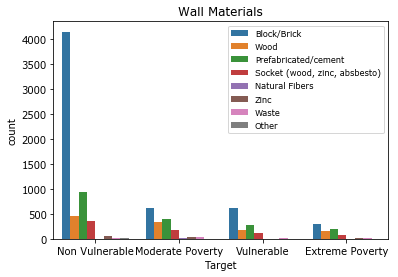

<Figure size 720x720 with 0 Axes>

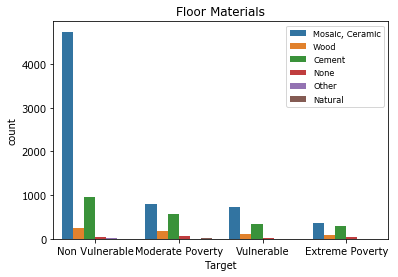

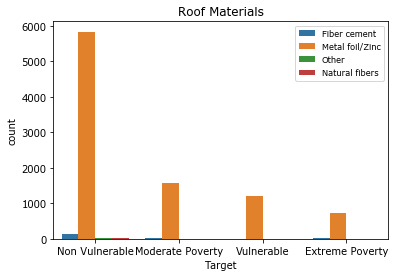

In [38]:
sns.countplot(x='Target', data=train, hue='wallmat')
plt.legend(loc=1, fontsize='small')
plt.title('Wall Materials')
plt.figure(figsize=(10,10))
plt.show()

sns.countplot(x='Target', data=train, hue='floormat')
plt.legend(loc=1, fontsize='small')
plt.title('Floor Materials')
plt.show()

sns.countplot(x='Target', data=train, hue='roofmat')
plt.legend(loc=1, fontsize='small')
plt.title('Roof Materials')
plt.show()

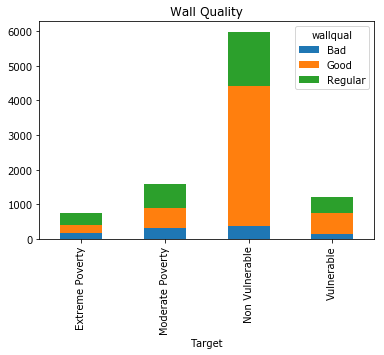

In [36]:
#quality
#create crosstab dataframes 
walldf = pd.crosstab(index=train['Target'], columns = train['wallqual'])
floordf = pd.crosstab(index=train['Target'], columns = train['floorqual'])
roofdf = pd.crosstab(index=train['Target'], columns = train['roofqual'])

#plot
walldf.plot(kind='bar', stacked=True)
plt.title('Wall Quality')
plt.show()

### Education

In [34]:
educdf = pd.crosstab(index=train['Target'], columns=train['educlevels'])
educdf

educlevels,Complete Acad. Secondary,Complete Primary,Complete Techn. Secondary,Incomplete Acad. Secondary,Incomplete Primary,Incomplete Techn. Secondary,None,Postgrad.,Undergrad.
Target,,,,,,,,,
Extreme Poverty,55,140,9,126,209,12,185,0,19
Moderate Poverty,121,373,10,283,414,30,315,1,50
Non Vulnerable,795,1167,120,1126,747,98,589,144,1208
Vulnerable,106,305,10,237,260,31,201,1,58


Text(0.5,1,'')

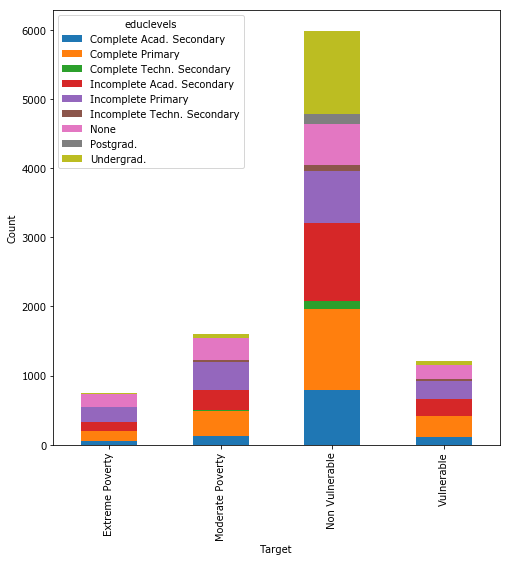

In [35]:
educdf.plot(kind='bar', figsize=(8,8), stacked=True)
plt.ylabel('Count')
plt.title('')

Non Vulnerable households seem to have a significant amount of individuals who have completed their education and undergrad, and smaller proportion of them incomplete. The other poverty levels have a significant proportion of individuals who either have incomplete, or none. 

### Overcrowding

In [49]:
def percent(num1, num2):
    num1 = float(num1)
    num2 = float(num2)
    percentage = '{0:.2f}'.format((num1 / num2 * 100))
    return percentage

overcrowd = pd.crosstab(index=train['Target'], columns=train['hacapo'], aggfunc=percent())

TypeError: percent() missing 2 required positional arguments: 'num1' and 'num2'